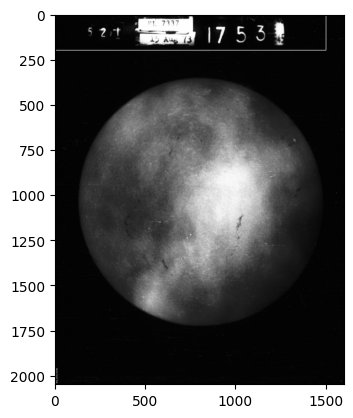

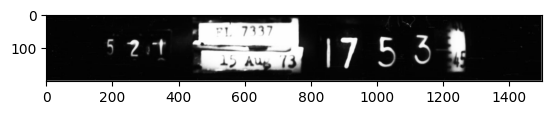

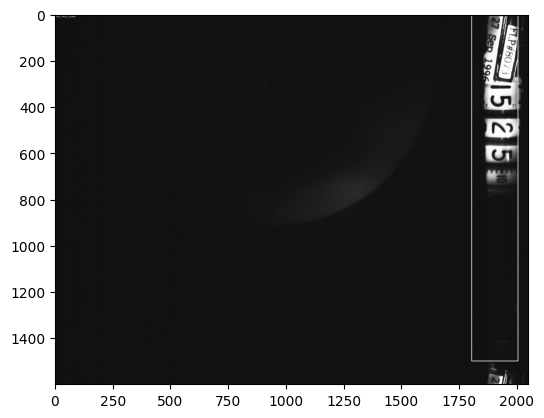

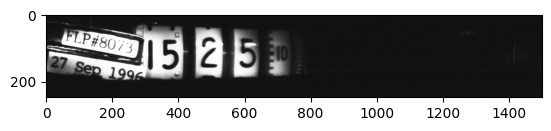

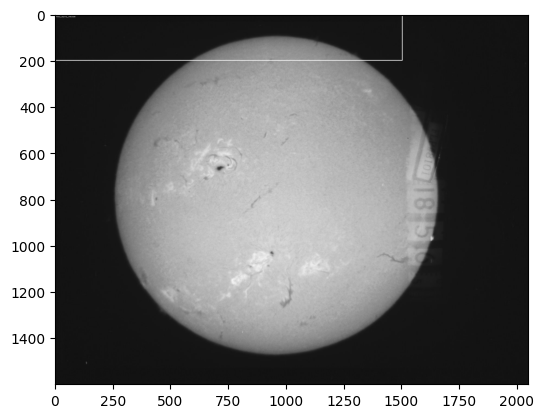

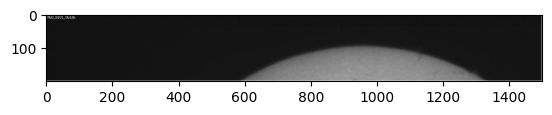

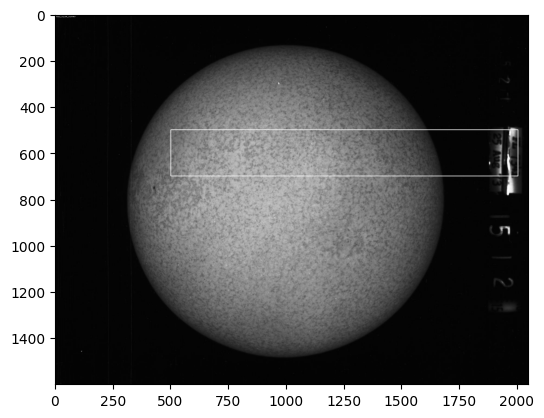

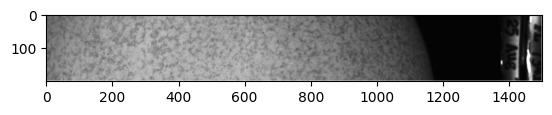

In [141]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def slide_window(image, window_sizes, step_size):
    # 处理多种窗口尺寸
    for window_size in window_sizes:
        winW, winH = window_size
        for y in range(0, image.shape[0] - winH, step_size):
            for x in range(0, image.shape[1] - winW, step_size):
                yield (x, y, winW, winH, image[y:y + winH, x:x + winW])

def recog_text(image ,window_sizes,stepSize):
    # 用于跟踪最大边缘密度和相关区域
    max_edge_density = 0
    best_region = None
    # 滑动窗口搜索
    for (x, y, winW, winH, window) in slide_window(image, window_sizes, stepSize):
        if window.shape[0] != winH or window.shape[1] != winW:
            continue

        # 边缘检测
        edges = cv2.Canny(window, 100, 200)
        edge_density = np.sum(edges) / (winW * winH)

        # 更新最大边缘密度和最佳区域
        if edge_density > max_edge_density:
            max_edge_density = edge_density
            best_region = (x, y, winW, winH, window.copy())  # 保留最佳区域的坐标和图像数据

    # 如果找到了最佳区域，切割并保存该区域
    if best_region is not None:
        x, y, winW, winH, best_window = best_region
        # 切割最佳区域
        cropped_image = image[y:y + winH, x:x + winW]
        if cropped_image.shape[:2][0] >= 1200:
            cropped_image = image[y:y + winH, x: x + 50 + winW]
            cropped_image = cv2.rotate(cropped_image, cv2.ROTATE_90_COUNTERCLOCKWISE)


        # 在原图上标记最佳区域
        cv2.rectangle(image, (x, y), (x + winW, y + winH), (255, 0, 0), 2)

    # 显示带有矩形标注的图像
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()


# 定义窗口尺寸和步长
window_sizes = [(1500, 200), (200, 1500)]
stepSize = 100

file_path_ch= "E:/pythonfile/main-task-image/"
# 读取图像
#image = cv2.imread('E:/pythonfile/main-task/nso_0233_01572.jpg', cv2.IMREAD_GRAYSCALE)
#image = cv2.imread(file_path_ch+"454/nso_0454_15946.jpg", cv2.IMREAD_GRAYSCALE)
#image = cv2.imread(file_path_ch+"8101/nso_8101_06336.jpg", cv2.IMREAD_GRAYSCALE)
image_path = ["233/nso_0233_00786.jpg", "454/nso_0454_15946.jpg", "8101/nso_8101_06336.jpg", "234/nso_0234_03040.jpg" ]
for file_name in image_path:
    image = cv2.imread(file_path_ch + file_name, cv2.IMREAD_GRAYSCALE)
    recog_text(image,window_sizes,stepSize)

In [107]:
import os
import cv2
from astropy.io import fits
import numpy as np
top_dir = 'E:/pythonfile/main-task-image/'

fts_gz_files = []
fts_jpg_files = []
for root, dirs, files in os.walk(top_dir):
    for file in files:
        if file.endswith('.fts.gz'):
            with fits.open(root+'/'+file) as hdul:
              data = np.flipud(hdul[0].data)
            fts_gz_files.append(data)
        if file.endswith('.jpg'):
            data = cv2.imread(root+'/'+file, cv2.IMREAD_GRAYSCALE)
            fts_jpg_files.append(data)


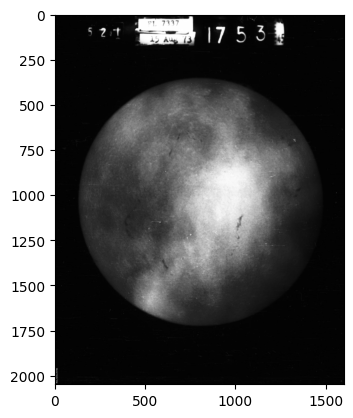

In [114]:
import matplotlib.pyplot as plt
plt.imshow(fts_jpg_files[0], cmap='gray')
#plt.imshow(fts_gz_files[0], cmap='gray')
plt.show()


In [119]:
def slide_window(image, window_sizes, step_size):
    # 处理多种窗口尺寸
    for window_size in window_sizes:
        winW, winH = window_size
        for y in range(0, image.shape[0] - winH, step_size):
            for x in range(0, image.shape[1] - winW, step_size):
                yield (x, y, winW, winH, image[y:y + winH, x:x + winW])

# 定义窗口尺寸和步长
window_sizes = [(1500, 200), (200, 1500)]
stepSize = 100

# 用于跟踪最大边缘密度和相关区域
max_edge_density = 0
best_region = None

In [124]:
i=0
#image =fts_jpg_files[i]
normalized_image = cv2.normalize(fts_gz_files[i], None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
uint8_image = normalized_image.astype(np.uint8)  # 转换为 uint8 类型
image =uint8_image

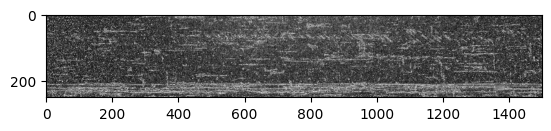

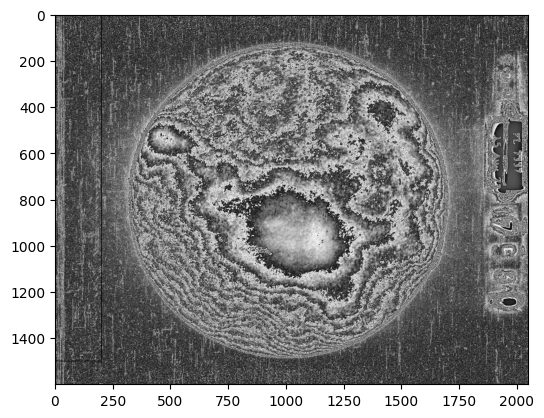

In [125]:
# 滑动窗口搜索
for (x, y, winW, winH, window) in slide_window(image, window_sizes, stepSize):
    if window.shape[0] != winH or window.shape[1] != winW:
        continue

    # 边缘检测
    edges = cv2.Canny(window, 100, 200)
    edge_density = np.sum(edges) / (winW * winH)

    # 更新最大边缘密度和最佳区域
    if edge_density > max_edge_density:
        max_edge_density = edge_density
        best_region = (x, y, winW, winH, window.copy())  # 保留最佳区域的坐标和图像数据

# 如果找到了最佳区域，切割并保存该区域
if best_region is not None:
    x, y, winW, winH, best_window = best_region
    # 切割最佳区域
    cropped_image = image[y:y + winH, x:x + winW]
    if cropped_image.shape[:2][0] >= 1200:
        cropped_image = image[y:y + winH, x: x+50+ winW]
        cropped_image = cv2.rotate(cropped_image, cv2.ROTATE_90_COUNTERCLOCKWISE)


    # 在原图上标记最佳区域
    cv2.rectangle(image, (x, y), (x + winW, y + winH), (0, 255, 0), 2)

# 显示带有矩形标注的图像
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()